1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

Number of Thallium atoms: [1000, 996, 994, 991, 990, 987, 979, 977, 973, 971, 970, 965, 962, 960, 954, 953, 950, 945, 942, 939, 936, 933, 927, 925, 919, 915, 913, 906, 903, 899, 895, 888, 887, 885, 879, 876, 874, 874, 873, 868, 867, 862, 861, 857, 854, 851, 847, 844, 842, 838, 836, 833, 829, 826, 820, 818, 814, 814, 809, 803, 801, 797, 795, 795, 790, 789, 787, 783, 782, 780, 778, 778, 775, 773, 772, 771, 769, 768, 766, 760, 756, 751, 744, 741, 739, 735, 735, 733, 730, 724, 722, 719, 715, 714, 712, 711, 709, 708, 707, 703, 700, 696, 692, 689, 687, 685, 681, 679, 676, 675, 669, 667, 663, 661, 658, 654, 651, 648, 647, 646, 645, 642, 641, 640, 640, 638, 635, 632, 627, 623, 623, 619, 617, 614, 610, 608, 606, 603, 603, 603, 600, 599, 599, 598, 598, 596, 593, 593, 590, 588, 586, 583, 583, 580, 578, 577, 577, 576, 574, 565, 560, 560, 558, 555, 550, 549, 549, 545, 542, 542, 540, 540, 538, 531, 531, 530, 530, 529, 526, 523, 518, 518, 515, 513, 510, 508, 508, 506, 502, 498, 498, 496, 496, 493, 49

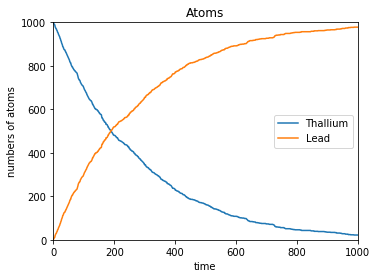

In [2]:
tau = 3.052*60

def pdf(t, tau = tau):
    """PDF."""
    return (1-2**(-t/tau))


time = 1000
t_tot = np.arange(0,time,1)

n_Tl = 1000
n_Pb = 0

l_Tl = []
l_Pb = []

for t in t_tot:
    for a in range(0,n_Tl,1):
        if random.uniform(0,1) < pdf(1,tau):
            n_Tl = n_Tl - 1     
            n_Pb = n_Pb + 1
    l_Tl.append(n_Tl)        
    l_Pb.append(n_Pb)
    
print('Number of Thallium atoms:',l_Tl)
print('Number of Lead atoms:',l_Pb)

plt.figure(figsize=(12,4))
plt.subplot(121)

plt.plot(t_tot, l_Tl, label = 'Thallium')
plt.plot(t_tot, l_Pb, label = 'Lead')
plt.legend()
plt.axis([0, time, 0, 1000])
plt.ylabel('numbers of atoms')
plt.xlabel('time')
plt.title('Atoms');

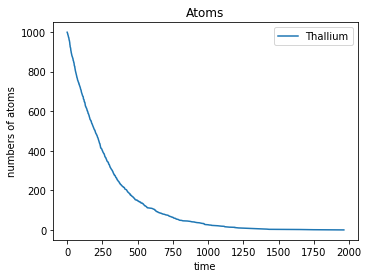

In [3]:
def pdf(t, tau = tau):
    return 2**(-t/tau)*np.log(2)/tau

def inverse(z, tau = tau):
    return (-tau/np.log(2)*np.log(1-z))

time = 1000
t_tot = np.arange(0,time,1)

n_Tl = 1000
n_Pb = 0

l_Tl = []
l_Pb = []


for a in range(0,n_Tl,1):
    t = inverse(random.uniform(0,1))    
    l_Tl.append(t)

l_Tl = np.sort(np.array(l_Tl))

#print('Number of Thallium atoms:',l_Tl)
#print('Number of Lead atoms:',l_Pb)

plt.figure(figsize=(12,4))
plt.subplot(121)

plt.plot(l_Tl, range(999,-1,-1), label = 'Thallium')
#plt.plot(t_tot, l_Pb, label = 'Lead')
plt.legend()
#plt.axis([0, time, 0, 1000])
plt.ylabel('numbers of atoms')
plt.xlabel('time')
plt.title('Atoms');

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
#Si lavora in unità fm e MeV
Z = 79.
e_2 = 1.44 * 2 
E = 7.7 
a_0 = 52917.77 
sigma = a_0/100.

N = np.power(10,6)

def impact_par(mu, sigma):
    x = random.gauss(mu, sigma)
    y = random.gauss(mu, sigma)    
    b = np.sqrt(x*x + y*y)
    return b

def scatter_tg(Z, e_2, E,b):
    return (Z * e_2)/(E * b)

b = [impact_par(0,sigma) for i in range(N)]
c = [scatter_tg(Z,e_2,E,i) for i in b]

In [5]:
def theta(x):
    return 2*np.arctan(x)

t = np.array([theta(i) for i in c])

angles = t[(t > (np.pi/2.))]

In [6]:
print(angles.shape[0])

1599


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

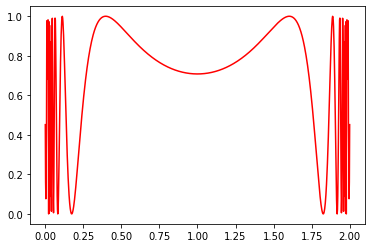

The mean is  1.4511678000000006 and the error  0.0030314681525623935


In [7]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x = np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')
plt.show()

N = 100000

n = 100
areas = []

for i in range(n):
    x = 2*np.random.uniform(0,1,N)
    y = np.random.uniform(0,1,N)
    points = np.array([f(x) for x in x])
    p = y[y<points]
    area = 2/N * p.shape[0]
    #print(area)
    areas.append(area)
    
mean = np.mean(areas)
std = np.std(areas)

print('The mean is ', mean, 'and the error ', std)

In [8]:
x = 2*np.random.uniform(0,1,N)
points = np.array([f(x) for x in x])

I = 2/N * np.sum(points)

std = 2/(np.sqrt(N)) * np.std(y)
print(I)

print('The area is ', I, 'and the error ', std)

1.4491229578909606
The area is  1.4491229578909606 and the error  0.0018253822962273046


We see that the error obtained by the mean value method is lesser than the hit or miss. Moreover, the computational time of the mean value is also lesser than the other.

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [9]:
r = 1 

N = 100000

def f(x,y):
    z = x*x + y*y
    if (z <= 1):
        return 1
    else:
        return 0  
    
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)

points = np.array([f(x,y) for x,y in zip(x,y)])

I = 4/N * np.sum(points)
print(I)

3.1432800000000003


In [10]:
def f(params):
    z = 0
    for i in params:
        z += i*i
        
    if (z <= 1):
        return 1
    else:
        return 0

D = 10
x = np.random.uniform(-1,1,size = (N,D)) 
p = np.array([f(i) for i in x]) 

I = np.power(2,10)/N * np.sum(p)
print(I)

2.6521600000000003


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [11]:
N = 100000

def f(x):
    return np.power(x,-1/2)/(np.exp(x) + 1) 

def w(x):
    if (x > 0):
        return 1/np.sqrt(x)

def inv(x):
    return x*x/4.
    
y = np.random.uniform(0,2,N)
wi = inv(y)

num = np.array([f(i) for i in wi ])
den = np.array([w(i) for i in wi ])

I = 2/N * np.sum( num/den )
print(I)

0.8393680957129545


The result is not correct, maybe it is a problem of the method used for calculating it.